# <b>Assignment : DT</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.sparse import hstack
from scipy import sparse

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import math
from prettytable import PrettyTable
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud, STOPWORDS
from prettytable import PrettyTable

<font color='red'><b> Please check below video before attempting this assignment</b></font>

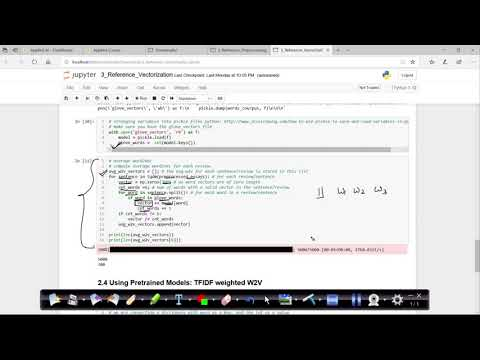

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

FileNotFoundError: ignored

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

# <font color='red'> <b>Task - 2</b></font>

In [ ]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


In [ ]:
# Tabulate your results

## 1.1 Loading Data

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [ ]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Task 1

##Data Import and split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of preprocessed_data.csv')

In [ ]:
df.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [ ]:
# 1. calculate sentiment scores for the essay feature 
sid = SentimentIntensityAnalyzer()
for i in tqdm(range(0,1)):
  df['neg'] = df['essay'].apply(lambda x: sid.polarity_scores(x)['neg'])
  df['neu'] = df['essay'].apply(lambda x: sid.polarity_scores(x)['neu'])
  df['pos'] = df['essay'].apply(lambda x: sid.polarity_scores(x)['pos'])
  df['compound'] = df['essay'].apply(lambda x: sid.polarity_scores(x)['compound'])

100%|██████████| 1/1 [13:51<00:00, 831.61s/it]


In [ ]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

Numerical Features:

- Price
- teacher_number_of_prviously_posted_projects
- neg
- neu
- pos
- compund


Categorical Features
- school_state
- teacher_prefix
- project_grade_category
- clean_categories
- clean_sub_categories

Text Features
 - essay

In [ ]:
y = df['project_is_approved'].values
X = df.drop('project_is_approved',axis = 1)

In [ ]:
print(type(df['project_is_approved']))
print(type(df['project_is_approved'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.3,random_state = 30)

print('Train Data:', X_train.shape,y_train.shape)
print('Test Data:', X_test.shape,y_test.shape)

#Making copy for fpr df
X_test1 = X_test.copy()
y_test1 = y_test.copy()

Train Data: (76473, 12) (76473,)
Test Data: (32775, 12) (32775,)


##Encoding Text Features

In [ ]:
# 3. perform tfidf vectorization of text data.

vect = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features = 5000)

X_train_essay_tfidf = vect.fit_transform(X_train['essay'])
X_test_essay_tfidf = vect.transform(X_test['essay'])

In [ ]:
#https://medium.com/analytics-vidhya/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097
# 4. perform tfidf w2v vectorization of text data.

#Using the glove vectors
with open('/content/drive/MyDrive/Dataset/Copy of glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#Tfidf 
vect = TfidfVectorizer(min_df = 10,ngram_range=(1,4),max_features = 5000)
tfidf = vect.fit(X_train['essay'])


dictionary = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
print(dictionary)
tfidf_words = list(tfidf.get_feature_names())
print(tfidf_words)

{'000': 5.9114264646252375, '10': 4.507089809907024, '100': 3.8013747499471457, '100 free': 5.576477844347525, '100 percent': 6.068838822659167, '100 students': 4.781343047244906, '100 students receive': 5.665454880754827, '100 students receive free': 5.680850566232801, '11': 5.543974983217117, '12': 4.733728340750833, '12th': 5.990877281189455, '13': 6.040148330196238, '14': 5.861199457880923, '15': 5.152132376790249, '16': 5.8834036151919324, '17': 5.998599327283365, '18': 5.389297294155, '19': 6.1113080497682795, '1st': 4.9912357100804, '1st grade': 5.642118200575591, '20': 4.494952686490491, '20 students': 6.1602066796897565, '2016': 5.573939771919053, '2017': 5.927541406017644, '21': 5.668236523716703, '21st': 4.0125318563809875, '21st century': 4.022689655562732, '21st century learners': 5.816600820080332, '21st century learning': 6.146631810598688, '21st century skills': 5.590553572581709, '22': 5.432360998587449, '23': 5.881677989224463, '24': 5.234394225457699, '25': 4.7767637

In [ ]:
#For train we will use only train essay and vectors
train_avg_tfidf =  []

for sent in tqdm(X_train['essay']):
  vect = np.zeros(300)
  tfidf_weight = 0
  for word in sent.split():
    if (word in glove_words) and (word in tfidf_words):
      #Get vector of word from glove
      vec = model[word]
      #tfidf is idf* tf
      tfidf_val = dictionary[word]* (sent.count(word)/len(sent.split()))
      #Appending the avg word to vec
      vect += (vec*tfidf_val)
      tfidf_weight += tfidf_val
  if tfidf_weight != 0:
    train_avg_tfidf.append(vect/tfidf_weight)



# tfidf weighted vector fo test using only the test essay 
test_avg_tfidf =  []

for sent in tqdm(X_test['essay']):
  vect = np.zeros(300)
  tfidf_weight = 0
  for word in sent.split():
    if (word in glove_words) and (word in tfidf_words):
      #Get vector of word from glove
      vec = model[word]
      #tfidf is idf* tf
      tfidf_val = dictionary[word]* (sent.count(word)/len(sent.split()))
      #Appending the avg word to vec
      vect += (vec*tfidf_val)
      tfidf_weight += tfidf_val
  if tfidf_weight != 0:
    test_avg_tfidf.append(vect/tfidf_weight)

100%|██████████| 32775/32775 [07:15<00:00, 75.22it/s]


In [ ]:
print(len(train_avg_tfidf))
print(len(train_avg_tfidf[0]))
print(len(test_avg_tfidf))
print(len(test_avg_tfidf[0]))

76473
300
32775
300


## Encoding Categorical features

In [ ]:
def cat_encode(train,test):
  vect = CountVectorizer()
  train = vect.fit_transform(train.values)
  test = vect.transform(test.values)
  return train,test


X_train_school_state, X_test_school_state = cat_encode(X_train['school_state'],X_test['school_state'])
X_train_teacher_prefix, X_test_teacher_prefix = cat_encode(X_train['teacher_prefix'],X_test['teacher_prefix'])
X_train_pgc, X_test_pgc = cat_encode(X_train['project_grade_category'],X_test['project_grade_category']) 
X_train_cc, X_test_cc = cat_encode(X_train['clean_categories'],X_test['clean_categories'])    
X_train_cs, X_test_cs = cat_encode(X_train['clean_subcategories'],X_test['clean_subcategories']) 

In [ ]:
X_train_cat = hstack((X_train_school_state,X_train_teacher_prefix,X_train_pgc,X_train_cc,X_train_cs)).tocsr()
X_test_cat = hstack((X_test_school_state,X_test_teacher_prefix,X_test_pgc,X_test_cc,X_test_cs)).tocsr()

print('\n')
print('Th final categorical variables')
print('X_train_cat shape:' ,X_train_cat.shape)
print('X_test_cat shape:', X_test_cat.shape)



Th final categorical variables
X_train_cat shape: (76473, 99)
X_test_cat shape: (32775, 99)


## Encoding Numerical Features

In [ ]:
def num_encode(train,test):
  norm = Normalizer()
  train = norm.fit_transform(train.values.reshape(-1,1))
  test = norm.transform(test.values.reshape(-1,1))
  return train, test

X_train_price, X_test_price = num_encode(X_train['price'],X_test['price'])
X_train_tnp, X_test_tnp = num_encode(X_train['teacher_number_of_previously_posted_projects'],X_test['teacher_number_of_previously_posted_projects'])
X_train_neg, X_test_neg = num_encode(X_train['neg'],X_test['neg'])
X_train_neu, X_test_neu = num_encode(X_train['neu'],X_test['neu'])
X_train_pos, X_test_pos = num_encode(X_train['pos'],X_test['pos'])
X_train_compound, X_test_compound = num_encode(X_train['compound'],X_test['compound'])




##Set 1

In [ ]:
#Data

X_train = hstack((X_train_essay_tfidf,X_train_cat,X_train_price,X_train_tnp,X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
X_test = hstack((X_test_essay_tfidf,X_test_cat,X_test_price,X_test_tnp,X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()

print('Train',X_train.shape,'y:',y_train.shape)
print('Test',X_test.shape,'y:',y_test.shape)

Train (76473, 5105) y: (76473,)
Test (32775, 5105) y: (32775,)


### Best Hyper Param and Train Test AUC

In [ ]:
#Finding Best Hyper Parametr

model = DecisionTreeClassifier()
param = {"max_depth": [1, 3, 10, 30], "min_samples_split" : [5, 10, 100, 500]}
grid = GridSearchCV(model,param, scoring = 'roc_auc', cv = 5,return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

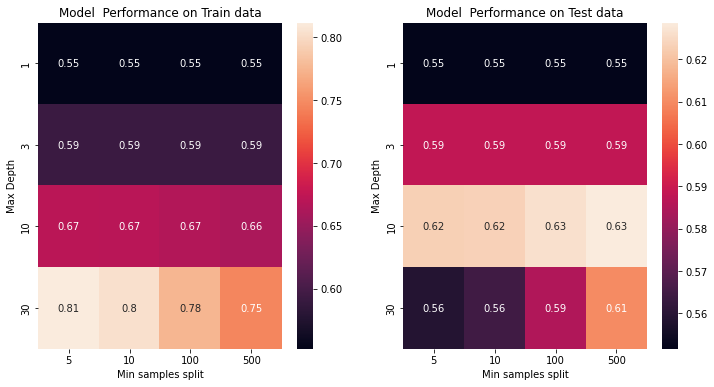

In [ ]:
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#Plotting the results 

train_auc = grid.cv_results_['mean_train_score'].reshape(4,4)
test_auc = grid.cv_results_['mean_test_score'].reshape(4,4)
columns=['5','10','100','500']
index=['1','3','10','30']
train_auc_df = pd.DataFrame(train_auc, index=index, columns=columns)
test_auc_df = pd.DataFrame(test_auc, index=index, columns=columns)


fig, ax  = plt.subplots(1,2,figsize = (12,6))
sns.heatmap(train_auc_df,ax = ax[0], annot=True)
ax[0].set_title("Model  Performance on Train data")
ax[0].set_xlabel("Min samples split")
ax[0].set_ylabel("Max Depth")


sns.heatmap(test_auc_df,ax = ax[1] ,annot=True)
ax[1].set_title("Model  Performance on Test data")
ax[1].set_xlabel("Min samples split")
ax[1].set_ylabel("Max Depth")
plt.show()

In [ ]:
print("The best params",grid.best_params_)
print("The best score:",grid.best_score_)

The best params {'max_depth': 10, 'min_samples_split': 500}
The best score: 0.6286669464036961


Train AUC  0.6558143848276566
Test AUC  0.618771828255685


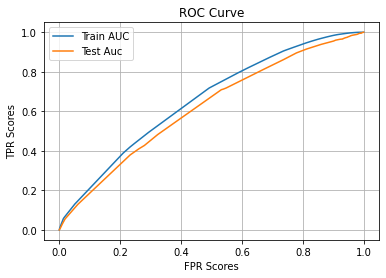

In [ ]:
#ROC Curve fr train and test
model = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'], min_samples_split = grid.best_params_['min_samples_split'])
model.fit(X_train,y_train)

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_prob)

plt.plot(train_fpr,train_tpr,label = 'Train AUC')
plt.plot(test_fpr,test_tpr,label = 'Test Auc')
plt.title('ROC Curve')
plt.xlabel('FPR Scores')
plt.ylabel('TPR Scores')
plt.legend()
plt.grid()

print('Train AUC ',auc(train_fpr,train_tpr))
print('Test AUC ',auc(test_fpr,test_tpr))

###Confusion Matrix

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# Predicting output with threshold from least fpr
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [ ]:
#Plotting Confusion Matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
train_cm_df = confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t))
print(train_cm_df)

print("Test confusion matrix")
test_cm_df = confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t))
print(test_cm_df)

the maximum value of tpr*(1-fpr) 0.3643863297708932 for threshold 0.863
Train confusion matrix
[[ 5879  5700]
 [18321 46573]]
Test confusion matrix
[[ 2320  2643]
 [ 8080 19732]]


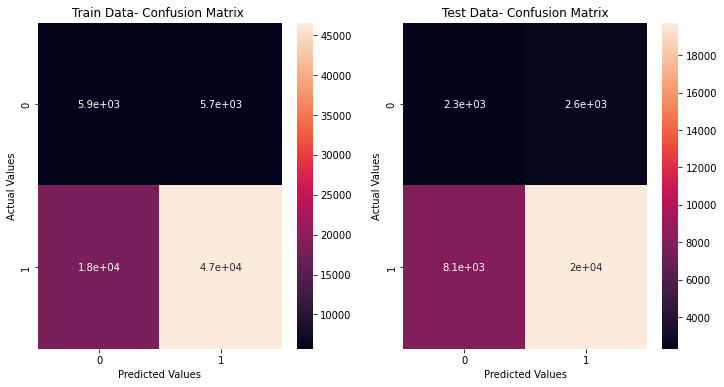

In [ ]:
fig, ax  = plt.subplots(1,2,figsize = (12,6))

sns.heatmap(train_cm_df,ax= ax[0],annot=True)
ax[0].set_title('Train Data- Confusion Matrix ')
ax[0].set_ylabel('Actual Values')
ax[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df,ax= ax[1],annot=True)
ax[1].set_title('Test Data- Confusion Matrix')
ax[1].set_ylabel('Actual Values')
ax[1].set_xlabel('Predicted Values')
plt.show()

###Getting all False Positive Points

####Word Cloud

In [ ]:
#False Positive are which are actual 0 but predicted 1

X_test1['actual'] = y_test1
X_test1['predicted'] = model.predict(X_test)

fpr_essay = []
for index, row in tqdm(X_test1.iterrows()):
  if (row['actual'] == 0) and (row['predicted'] ==1):
    fpr_essay.append(row['essay'])


32775it [00:01, 18561.58it/s]


In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS)

for essay in tqdm(fpr_essay):
  val = str(essay)
  tokens = val.split()
  tokens = [i.lower() for i in tokens]
  for word in tokens:
    comment_words = comment_words + word +' '

100%|██████████| 4858/4858 [05:12<00:00, 15.54it/s]


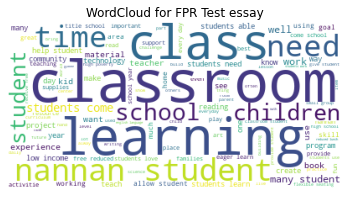

In [ ]:
wordcloud = WordCloud(width =400,height = 200,stopwords= stopwords,background_color='white').generate(comment_words)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.title("WordCloud for FPR Test essay")
plt.axis('off')
plt.show()

####BoxPlot

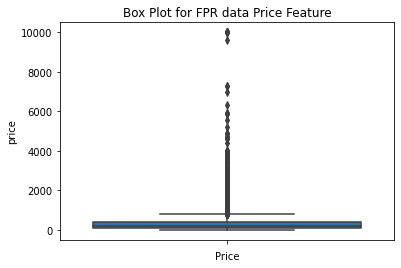

In [ ]:
#https://stackoverflow.com/questions/18500011/horizontal-box-plots-in-matplotlib-pandas


sns.boxplot(y = X_test1['price'])
plt.title('Box Plot for FPR data Price Feature')
plt.xlabel('Price')
plt.show()

####CDF

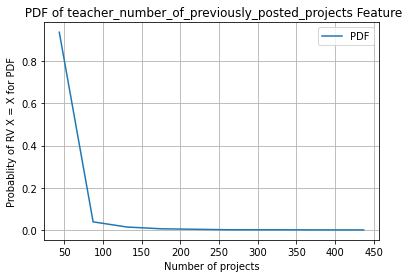

In [ ]:
#Plotting PDF for teacher number of previously project posted

counts,bins  = np.histogram(X_test1['teacher_number_of_previously_posted_projects'])
pdf = counts/(sum(counts))
plt.plot(bins[1:], pdf,label='PDF')
plt.title(' PDF of teacher_number_of_previously_posted_projects Feature')
plt.xlabel('Number of projects')
plt.ylabel("Probablity of RV X = X for PDF")
plt.grid()
plt.legend()
plt.show()

###Task 2

In [ ]:
#Training new model for getting features with 0 importance

model = DecisionTreeClassifier(max_depth = None, min_samples_split = 10)
model.fit(X_train,y_train)

features = model.feature_importances_

non_zero_index = []
for i in range(len(features)):
  if features[i]>0:
    non_zero_index.append(i)

print('There are total features:',(X_train.shape[1]))
print('There are non zero features:',len(non_zero_index)+1)

X_train_non_zero = X_train[:,non_zero_index]
X_test_non_zero = X_test[:,non_zero_index]

print('Train Non zero: ',X_train_non_zero.shape,'Test Non zero: ',X_test_non_zero.shape, )

There are total features: 5105
There are non zero features: 2794
Train Non zero:  (76473, 2793) Test Non zero:  (32775, 2793)


####Best Hyper Param and Train Test AUC

In [ ]:
#Finding Best Hyper Parameter

model = DecisionTreeClassifier()
param = {"max_depth": [1, 3, 10, 30], "min_samples_split" : [5, 10, 100, 500]}
grid = GridSearchCV(model,param, scoring = 'roc_auc', cv = 5,return_train_score=True)
grid.fit(X_train_non_zero,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

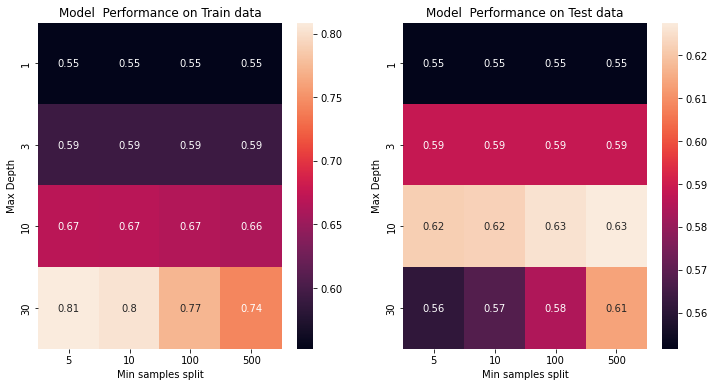

In [ ]:
#Hyperparameter tuning
train_auc = grid.cv_results_['mean_train_score'].reshape(4,4)
test_auc = grid.cv_results_['mean_test_score'].reshape(4,4)
columns=['5','10','100','500']
index=['1','3','10','30']
train_auc_df = pd.DataFrame(train_auc, index=index, columns=columns)
test_auc_df = pd.DataFrame(test_auc, index=index, columns=columns)


fig, ax  = plt.subplots(1,2,figsize = (12,6))
sns.heatmap(train_auc_df,ax = ax[0], annot=True)
ax[0].set_title("Model  Performance on Train data")
ax[0].set_xlabel("Min samples split")
ax[0].set_ylabel("Max Depth")


sns.heatmap(test_auc_df,ax = ax[1] ,annot=True)
ax[1].set_title("Model  Performance on Test data")
ax[1].set_xlabel("Min samples split")
ax[1].set_ylabel("Max Depth")
plt.show()

In [ ]:
print("The best params",grid.best_params_)
print("The best score:",grid.best_score_)

The best params {'max_depth': 10, 'min_samples_split': 500}
The best score: 0.62758206991899


Train AUC  0.6558143848276566
Test AUC  0.6187403787886537


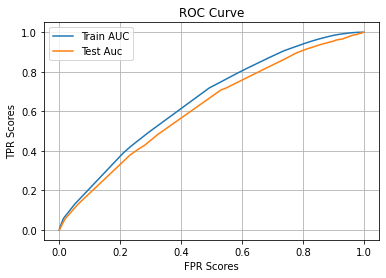

In [ ]:
#ROC Curve fr train and test
model = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'], min_samples_split = grid.best_params_['min_samples_split'])
model.fit(X_train,y_train)

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_prob)

plt.plot(train_fpr,train_tpr,label = 'Train AUC')
plt.plot(test_fpr,test_tpr,label = 'Test Auc')
plt.title('ROC Curve')
plt.xlabel('FPR Scores')
plt.ylabel('TPR Scores')
plt.legend()
plt.grid()

print('Train AUC ',auc(train_fpr,train_tpr))
print('Test AUC ',auc(test_fpr,test_tpr))

####Confusion Matrix

In [ ]:
#Plotting Confusion Matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
train_cm_df = confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t))
print(train_cm_df)

print("Test confusion matrix")
test_cm_df = confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t))
print(test_cm_df)

the maximum value of tpr*(1-fpr) 0.3643863297708932 for threshold 0.863
Train confusion matrix
[[ 5879  5700]
 [18321 46573]]
Test confusion matrix
[[ 2320  2643]
 [ 8080 19732]]


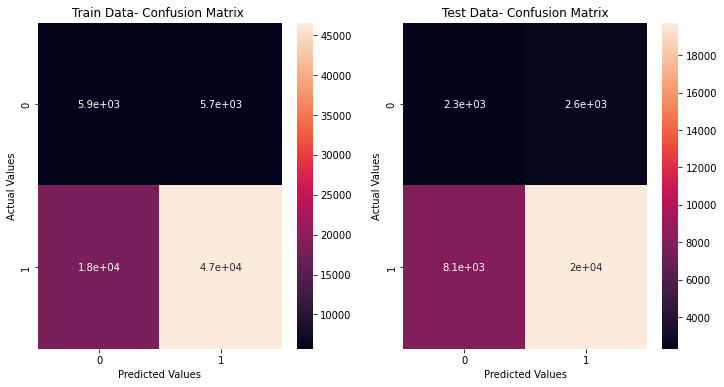

In [ ]:
fig, ax  = plt.subplots(1,2,figsize = (12,6))

sns.heatmap(train_cm_df,ax= ax[0],annot=True)
ax[0].set_title('Train Data- Confusion Matrix ')
ax[0].set_ylabel('Actual Values')
ax[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df,ax= ax[1],annot=True)
ax[1].set_title('Test Data- Confusion Matrix')
ax[1].set_ylabel('Actual Values')
ax[1].set_xlabel('Predicted Values')
plt.show()

##Set 2

In [ ]:
#Data

X_train = hstack((train_avg_tfidf,X_train_cat,X_train_price,X_train_tnp,X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
X_test = hstack((test_avg_tfidf,X_test_cat,X_test_price,X_test_tnp,X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()

print('Train',X_train.shape,'y:',y_train.shape)
print('Test',X_test.shape,'y:',y_test.shape)

Train (76473, 405) y: (76473,)
Test (32775, 405) y: (32775,)


### Best Hyper Param and Train Test AUC

In [ ]:
#Finding Best Hyper Parametr

model = DecisionTreeClassifier()
param = {"max_depth": [1, 3, 10, 30], "min_samples_split" : [5, 10, 100, 500]}
grid = GridSearchCV(model,param, scoring = 'roc_auc', cv = 5,return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

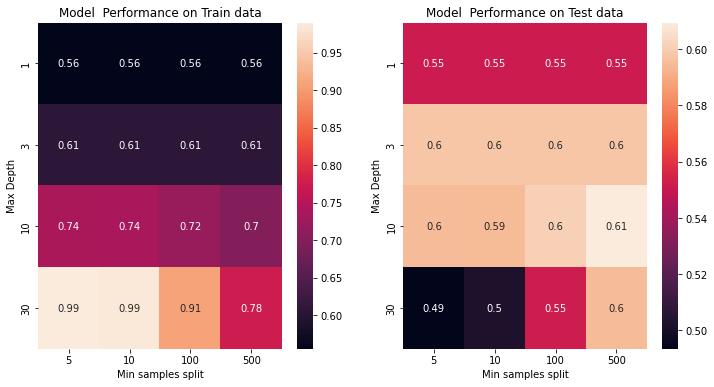

In [ ]:
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#Plotting the results 

train_auc = grid.cv_results_['mean_train_score'].reshape(4,4)
test_auc = grid.cv_results_['mean_test_score'].reshape(4,4)
columns=['5','10','100','500']
index=['1','3','10','30']
train_auc_df = pd.DataFrame(train_auc, index=index, columns=columns)
test_auc_df = pd.DataFrame(test_auc, index=index, columns=columns)


fig, ax  = plt.subplots(1,2,figsize = (12,6))
sns.heatmap(train_auc_df,ax = ax[0], annot=True)
ax[0].set_title("Model  Performance on Train data")
ax[0].set_xlabel("Min samples split")
ax[0].set_ylabel("Max Depth")


sns.heatmap(test_auc_df,ax = ax[1] ,annot=True)
ax[1].set_title("Model  Performance on Test data")
ax[1].set_xlabel("Min samples split")
ax[1].set_ylabel("Max Depth")
plt.show()

In [ ]:
print("The best params",grid.best_params_)
print("The best score:",grid.best_score_)

The best params {'max_depth': 10, 'min_samples_split': 500}
The best score: 0.6094674713236549


Train AUC  0.6957987035388433
Test AUC  0.6148429921763346


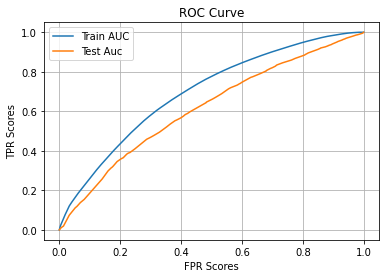

In [ ]:
#ROC Curve fr train and test
model = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'], min_samples_split = grid.best_params_['min_samples_split'])
model.fit(X_train,y_train)

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_prob)

plt.plot(train_fpr,train_tpr,label = 'Train AUC')
plt.plot(test_fpr,test_tpr,label = 'Test Auc')
plt.title('ROC Curve')
plt.xlabel('FPR Scores')
plt.ylabel('TPR Scores')
plt.legend()
plt.grid()

print('Train AUC ',auc(train_fpr,train_tpr))
print('Test AUC ',auc(test_fpr,test_tpr))

###Confusion Matrix

In [ ]:
#Plotting Confusion Matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
train_cm_df = confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t))
print(train_cm_df)

print("Test confusion matrix")
test_cm_df = confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t))
print(test_cm_df)

the maximum value of tpr*(1-fpr) 0.41475024103628144 for threshold 0.855
Train confusion matrix
[[ 7298  4281]
 [22191 42703]]
Test confusion matrix
[[ 2608  2355]
 [10072 17740]]


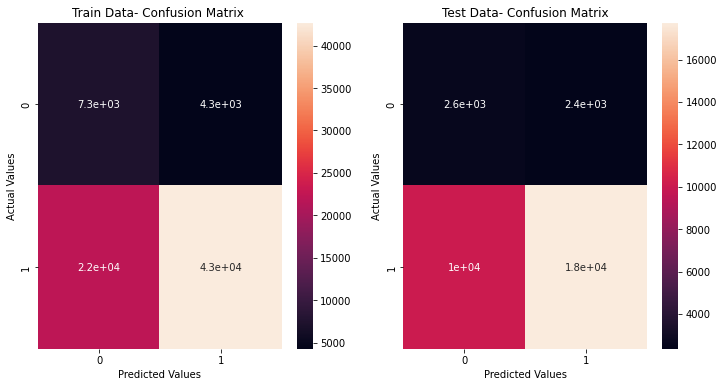

In [ ]:
fig, ax  = plt.subplots(1,2,figsize = (12,6))

sns.heatmap(train_cm_df,ax= ax[0],annot=True)
ax[0].set_title('Train Data- Confusion Matrix ')
ax[0].set_ylabel('Actual Values')
ax[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df,ax= ax[1],annot=True)
ax[1].set_title('Test Data- Confusion Matrix')
ax[1].set_ylabel('Actual Values')
ax[1].set_xlabel('Predicted Values')
plt.show()

###Getting all FPR Data points

####Word Cloud

In [ ]:
#False Positive are which are actual 0 but predicted 1

X_test1['actual'] = y_test1
X_test1['predicted'] = model.predict(X_test)

fpr_essay = []
for index, row in tqdm(X_test1.iterrows()):
  if (row['actual'] == 0) and (row['predicted'] ==1):
    fpr_essay.append(row['essay'])


32775it [00:01, 17699.75it/s]


In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS)

for essay in tqdm(fpr_essay):
  val = str(essay)
  tokens = val.split()
  tokens = [i.lower() for i in tokens]
  for word in tokens:
    comment_words = comment_words + word +' '

100%|██████████| 4866/4866 [04:43<00:00, 17.14it/s]


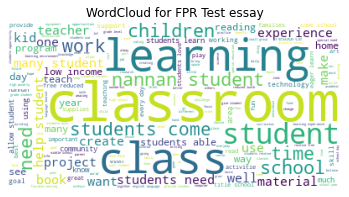

In [ ]:
wordcloud = WordCloud(width =400,height = 200,stopwords= stopwords,background_color='white').generate(comment_words)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.title("WordCloud for FPR Test essay")
plt.axis('off')
plt.show()

####Boxplot

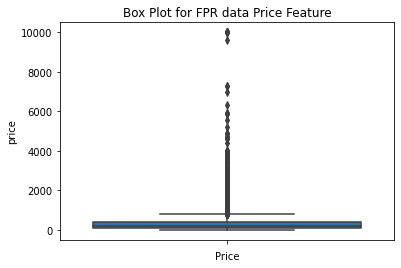

In [ ]:
#https://stackoverflow.com/questions/18500011/horizontal-box-plots-in-matplotlib-pandas


sns.boxplot(y = X_test1['price'])
plt.title('Box Plot for FPR data Price Feature')
plt.xlabel('Price')
plt.show()

####PDF

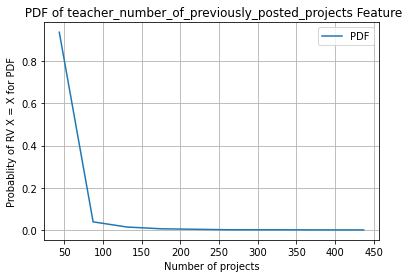

In [ ]:
#Plotting PDF for teacher number of previously project posted

counts,bins  = np.histogram(X_test1['teacher_number_of_previously_posted_projects'])
pdf = counts/(sum(counts))
plt.plot(bins[1:], pdf,label='PDF')
plt.title(' PDF of teacher_number_of_previously_posted_projects Feature')
plt.xlabel('Number of projects')
plt.ylabel("Probablity of RV X = X for PDF")
plt.grid()
plt.legend()
plt.show()

#Results:

In [7]:
myTable = PrettyTable(["Model", "Vectorizer", "max_depth","min_samples_split", "Train AUC","Test AUC"])
myTable.add_row(["DT", "TFIDF", "3","100","60 %", "55 %"])
myTable.add_row(["DT with non zero Features", "TFIDF", "30","500", "80 %","48 %"])
myTable.add_row(["DT", "TFIDF W2V", "30","100", "90 %","54 %"])
myTable.title = 'Results for 40k points'

print(myTable)

+-----------------------------------------------------------------------------------------------+
|                                     Results for 40k points                                    |
+---------------------------+------------+-----------+-------------------+-----------+----------+
|           Model           | Vectorizer | max_depth | min_samples_split | Train AUC | Test AUC |
+---------------------------+------------+-----------+-------------------+-----------+----------+
|             DT            |   TFIDF    |     3     |        100        |    60 %   |   55 %   |
| DT with non zero Features |   TFIDF    |     30    |        500        |    80 %   |   48 %   |
|             DT            | TFIDF W2V  |     30    |        100        |    90 %   |   54 %   |
+---------------------------+------------+-----------+-------------------+-----------+----------+


In [8]:
myTable = PrettyTable(["Model", "Vectorizer", "max_depth","min_samples_split", "Train AUC","Test AUC"])
myTable.add_row(["DT", "TFIDF", "10","500","66 %", "62 %"])
myTable.add_row(["DT with non zero Features", "TFIDF", "10","500", "66 %","62 %"])
myTable.add_row(["DT", "TFIDF W2V", "10","500", "70 %","62 %"])
myTable.title = 'Results for all points'

print(myTable)

+-----------------------------------------------------------------------------------------------+
|                                     Results for all points                                    |
+---------------------------+------------+-----------+-------------------+-----------+----------+
|           Model           | Vectorizer | max_depth | min_samples_split | Train AUC | Test AUC |
+---------------------------+------------+-----------+-------------------+-----------+----------+
|             DT            |   TFIDF    |     10    |        500        |    66 %   |   62 %   |
| DT with non zero Features |   TFIDF    |     10    |        500        |    66 %   |   62 %   |
|             DT            | TFIDF W2V  |     10    |        500        |    70 %   |   62 %   |
+---------------------------+------------+-----------+-------------------+-----------+----------+


Conclusion:

- Final Models:
 - Set 1: Train Auc: 66 %   Test Auc: 62%     Max_depth = 10, min_samples_split = 500

- Set 2: Train Auc: 70 %   Test Auc: 62%     Max_depth = 10, min_samples_split = 500

- From the table we can conclude that the tfidf  is better fit than TFIDF W2V vectorization as the train and test auc are almost similar

- But in case of TFIDF W2v there is more gap hence the model has overfit



- Both  the models get the same values of max_depth = 10, min_samples_split = 500

- The accuracy changes drastically when we consider all the points as when we considered the 40k feature the models are overfitting and test accuracy is less tha 50% 


- The word cloud for both the dataset are aslo almost similar. With top word as Classroom, School and  Learning

 - The Boxplot and PDF are same for both the datasets as the features remain same

- To further increase accuracy we need to work on feature engineering